In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i runup_funcs.py
%run -i wave_funcs.py 
drv, _ = which_computer()

In [6]:
1.115+1.309

2.424

In [7]:
dfb = pd.read_csv(drv+'crs/proj/2022_runup/beaches.csv', index_col=0, header=0).T
dfb

name,HoM,Marconi,PeaIs,MadB
wx,BOX,BOX,MHX,TBW
site_ID,1572,1548,6024,3665
record,125,3603,289,62
sl_lon,289.921,69.965,284.522,277.198
sl_lat,42.0511,41.8965,35.6713,27.8008
toe,6.3,5.51,3.34,1.34
crest,17.0,16.2,5.88,2.16
slope,0.1027,0.2549,0.086,0.0493
95_up,0.1532,0.4242,0.1363,0.0787
95_low,0.0522,0.0855,0.0358,0.0199


In [8]:
dfb['HoM']['slope']

0.1027

In [9]:
df_hom = pd.read_csv(drv+'crs/proj/2022_runup/hom_stats.csv', delim_whitespace=True, index_col=0, header=0).T
df_hom

var,H_s,T_p,Dir,Dir_scaled,H0L0,Iribarren,WL,subtidal,tides,runup,runup95,TWL,TWL95
mean,0.969,6.08,22.6,21.1,79.0,0.992,-0.0278,-0.0278,-0.000145,0.696,0.973,0.669,0.945
std,0.606,1.95,46.7,43.8,69.9,0.274,0.8450,0.0941,0.829000,0.378,0.528,0.923,0.993
5,0.323,3.21,44.8,39.1,16.4,0.639,-1.2900,-0.1830,-1.230000,0.247,0.346,-0.743,-0.571
16,0.454,4.08,43.4,36.2,26.1,0.729,-1.0000,-0.1050,-0.960000,0.359,0.502,-0.370,-0.148
50,0.812,5.92,19.8,22.2,58.5,0.948,-0.0218,-0.0258,0.005960,0.613,0.857,0.683,0.955
85,1.520,8.16,57.7,63.6,133.0,1.270,0.9560,0.0505,0.973000,1.050,1.470,1.670,1.980
95,2.110,9.52,45.4,52.5,210.0,1.500,1.2400,0.1200,1.240000,1.420,1.990,2.120,2.560
99,3.100,11.20,45.5,48.8,349.0,1.820,1.5000,0.2320,1.480000,1.940,2.720,2.690,3.340


In [10]:
df_hom['T_p']['mean']

6.08

In [11]:
# Load statistics 
Hs = [df_hom['H_s']['5'],df_hom['H_s']['50'],df_hom['H_s']['95']]
Tp = np.array((df_hom['T_p']['5'],df_hom['T_p']['50'],df_hom['T_p']['95']))
Lo = calc_L0(Tp)

print(func_list)

slopes = [dfb['HoM']['95_low'],dfb['HoM']['slope'],dfb['HoM']['95_up']]

['A17', 'D20', 'H86', 'NH91', 'P14', 'R01', 'S06', 'S11', 'V12']


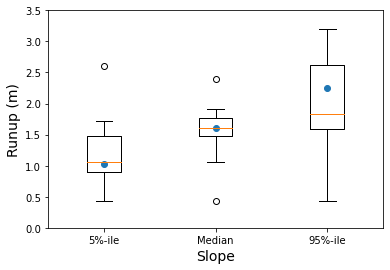

In [17]:
# Variation due to slopes
R2_slopes = np.empty((len(func_list),3))

for j, sl in enumerate( slopes ):       
    for i, item in enumerate( func_list):
        cmd = "R2_slopes[i][j]={}({}, {}, {})".format(item, Hs[2], Lo[2], sl)
        #print(cmd)
        exec(cmd)

#plt.title('95th percentile H_s and T_p')
plt.boxplot(R2_slopes, notch=False)
plt.ylim([0,3.5])
plt.plot([1,2,3],R2_slopes[6],'o')
plt.ylabel('Runup (m)', fontsize=14)

plt.xticks([1,2,3], ['5%-ile','Median','95%-ile'])
plt.xlabel('Slope',fontsize=14)
plt.savefig(drv+'crs/proj/2022_Runup/HoM_nine_equations_boxplot.svg', dpi=200)

In [16]:
print("95 low")
stat_summary(R2_slopes[:,0], iprint=True)
print("median")
stat_summary(R2_slopes[:,1], iprint=True)
print("95 high")
stat_summary(R2_slopes[:,2], iprint=True)

95 low
  n, nnan, nvalid:  9 0 9
  mean, std, min, max   : 1.248 0.627 0.427 2.599
  d5, d25, d50, d75, d95: 0.473 0.893 1.066 1.476 2.250
median
  n, nnan, nvalid:  9 0 9
  mean, std, min, max   : 1.548 0.522 0.432 2.403
  d5, d25, d50, d75, d95: 0.686 1.472 1.611 1.772 2.210
95 high
  n, nnan, nvalid:  9 0 9
  mean, std, min, max   : 1.983 0.765 0.438 3.205
  d5, d25, d50, d75, d95: 0.851 1.590 1.826 2.621 2.980


{'n': 9,
 'nnan': 0,
 'nvalid': 9,
 'mean': 1.983343907422549,
 'std': 0.7649582857788203,
 'min': 0.43752732228909663,
 'max': 3.2047302929892605,
 'd5': 0.85137755570958,
 'd25': 1.5904852212520109,
 'd50': 1.8260635698944383,
 'd75': 2.6206963596971526,
 'd95': 2.9799631089471714}

In [ ]:
R2_hs = np.empty((len(func_list),3))

for j, hsj in enumerate( Hs ):       
    for i, item in enumerate( func_list):
        cmd = "R2_hs[i][j]={}({}, {}, {})".format(item, hsj, Lo[1], slopes[1])
        #print(cmd)
        exec(cmd)

print(R2_hs)

In [ ]:
R2_tp = np.empty((len(func_list),3))

for j, loj in enumerate( Lo ):       
    for i, item in enumerate( func_list):
        cmd = "R2_tp[i][j]={}({}, {}, {})".format(item, Hs[1], loj, slopes[1])
        #print(cmd)
        exec(cmd)

print(R2_tp)

In [ ]:
dang = Hs = np.array([df_hom['Dir_scaled']['5'],df_hom['Dir_scaled']['50'],dfb['HoM']['d_n'],df_hom['Dir_scaled']['95']])-dfb['HoM']['d_n']
print(dang)
dfb['HoM']['d_n']

In [ ]:
plt.title('Slope (median H_s and T_p)')
plt.boxplot(R2_slopes, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('Slope',fontsize=14)

In [ ]:
plt.title('H_s (median slope and T_p)')
plt.boxplot(R2_hs, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('H_s',fontsize=14)

In [ ]:
plt.title('T_p (median H_s and slope)')
plt.boxplot(R2_tp, notch=True)
plt.ylim([0,1.5])
plt.ylabel('Runup (m)', fontsize=14)
['95%-low','Median','95%-high']
plt.xticks([1,2,3], ['95%-low','Median','95%-high'])
plt.xlabel('T_p',fontsize=14)